In [2]:
import pandas_datareader as pdr
key = "71033ea893dd82e0f80d38aee621aae2d94ca2a6"
# key = "---------------------------------------"
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.head()


<ipython-input-2-ea6459b1719b>:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


close    high     low    open    volume  \
symbol date                                                                  
AAPL   2019-02-04 00:00:00+00:00  171.25  171.66  167.28  167.41  31495582   
       2019-02-05 00:00:00+00:00  174.18  175.08  172.35  172.86  36101628   
       2019-02-06 00:00:00+00:00  174.24  175.57  172.85  174.65  28239591   
       2019-02-07 00:00:00+00:00  170.94  173.94  170.34  172.40  31741690   
       2019-02-08 00:00:00+00:00  170.41  170.66  168.42  168.99  23819966   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2019-02-04 00:00:00+00:00  41.090613  41.188990  40.138031  40.169223   
       2019-02-05 00:00:00+00:00  41.793652  42.009603  41.354553  41.476925   
       2019-02-06 00:00:00+00:00  41.808049  42.127176  41.474525  41.906427   
       2019-02-07 00:00:00+00:00  41.016230  41.736066  40.872263  41.366550   
       2019-02-08 00:00:00+00:00  41.064219  41.124462  40.584683  40.722037   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2019-02-04 00:00:00+00:00  125982328     0.00          1.0  
       2019-02-05 00:00:00+00:00  144406512     0.00          1.0  
       2019-02-06 00:00:00+00:00  112958364     0.00          1.0  
       2019-02-07 00:00:00+00:00  126966760     0.00          1.0  
       2019-02-08 00:00:00+00:00   95279864     0.73          1.0

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df.to_csv("apple.csv")

In [4]:
data = pd.read_csv("apple.csv")
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2024-01-29 00:00:00+00:00,191.73,192.200,189.58,192.010,47145622,191.73,192.200,189.58,192.010,47145622,0.0,1.0
1255,AAPL,2024-01-30 00:00:00+00:00,188.04,191.800,187.47,190.940,55859370,188.04,191.800,187.47,190.940,55859370,0.0,1.0
1256,AAPL,2024-01-31 00:00:00+00:00,184.40,187.095,184.35,187.040,55467803,184.40,187.095,184.35,187.040,55467803,0.0,1.0
1257,AAPL,2024-02-01 00:00:00+00:00,186.86,186.950,183.82,183.985,64885408,186.86,186.950,183.82,183.985,64885408,0.0,1.0
1258,AAPL,2024-02-02 00:00:00+00:00,185.85,187.330,179.25,179.860,102551680,185.85,187.330,179.25,179.860,102551680,0.0,1.0


In [5]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [6]:
df = pd.read_csv("apple.csv")
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2024-01-29 00:00:00+00:00,191.73,192.200,189.58,192.010,47145622,191.73,192.200,189.58,192.010,47145622,0.0,1.0
1255,AAPL,2024-01-30 00:00:00+00:00,188.04,191.800,187.47,190.940,55859370,188.04,191.800,187.47,190.940,55859370,0.0,1.0
1256,AAPL,2024-01-31 00:00:00+00:00,184.40,187.095,184.35,187.040,55467803,184.40,187.095,184.35,187.040,55467803,0.0,1.0
1257,AAPL,2024-02-01 00:00:00+00:00,186.86,186.950,183.82,183.985,64885408,186.86,186.950,183.82,183.985,64885408,0.0,1.0
1258,AAPL,2024-02-02 00:00:00+00:00,185.85,187.330,179.25,179.860,102551680,185.85,187.330,179.25,179.860,102551680,0.0,1.0


In [7]:
df['ds'] = pd.to_datetime(df['date'])
df['y'] = df['close']
df = df[['ds', 'y']]
df.head()

,ds,y
0,2019-02-04 00:00:00+00:00,171.25
1,2019-02-05 00:00:00+00:00,174.18
2,2019-02-06 00:00:00+00:00,174.24
3,2019-02-07 00:00:00+00:00,170.94
4,2019-02-08 00:00:00+00:00,170.41


In [8]:
df['ds'] = df['ds'].dt.tz_localize(None)

<ipython-input-8-f9a173cd63a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = df['ds'].dt.tz_localize(None)


In [9]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp73oexuc6/ta5192n0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp73oexuc6/g9_es0um.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92516', 'data', 'file=/tmp/tmp73oexuc6/ta5192n0.json', 'init=/tmp/tmp73oexuc6/g9_es0um.json', 'output', 'file=/tmp/tmp73oexuc6/prophet_modelfi37bsb0/prophet_model-20240203113724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:37:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:37:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods=12 * 5,
								freq='M')

In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
		'yhat_upper', 'trend',
		'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
1314,2028-09-30,368.641804,-886.018980,1526.054620,391.119386,-865.536697,1559.825461
1315,2028-10-31,378.770542,-930.663290,1592.122924,394.651879,-890.484953,1587.317975
1316,2028-11-30,393.345458,-937.347191,1626.560029,398.070422,-930.163205,1615.779944
1317,2028-12-31,408.976845,-950.357302,1664.721297,401.602915,-974.010486,1655.797443
1318,2029-01-31,414.853925,-993.379204,1690.370433,405.135409,-1018.108001,1694.274028


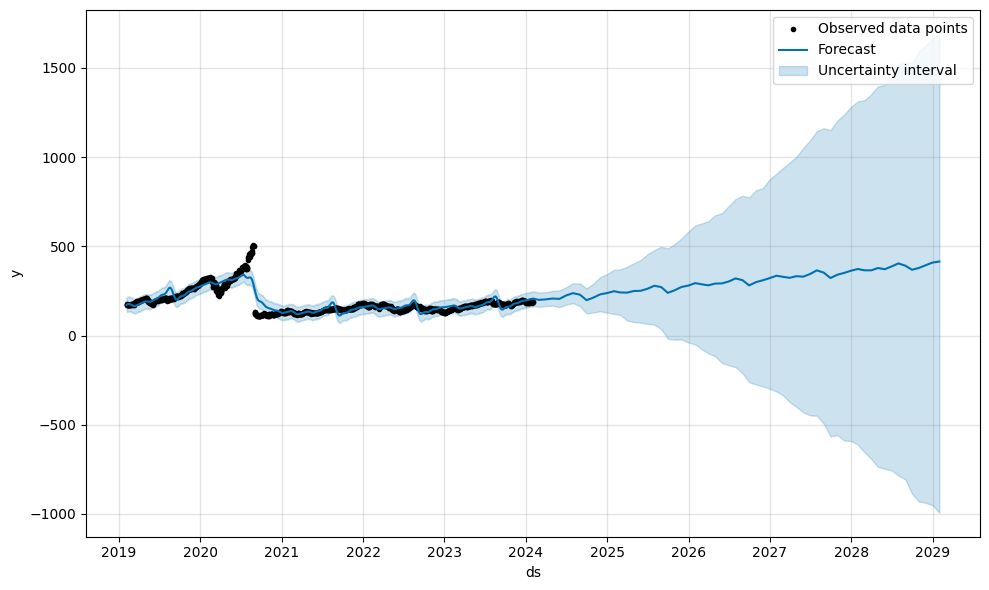

In [12]:
fig1 = m.plot(forecast, include_legend=True)

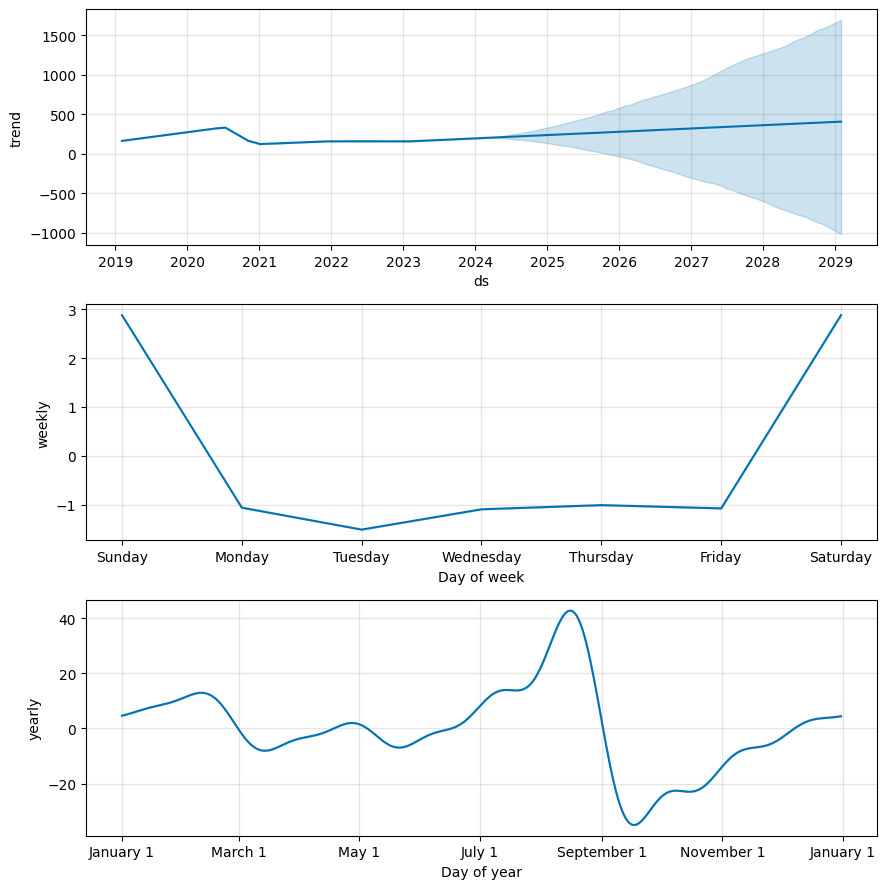

In [13]:
fig2 = m.plot_components(forecast)

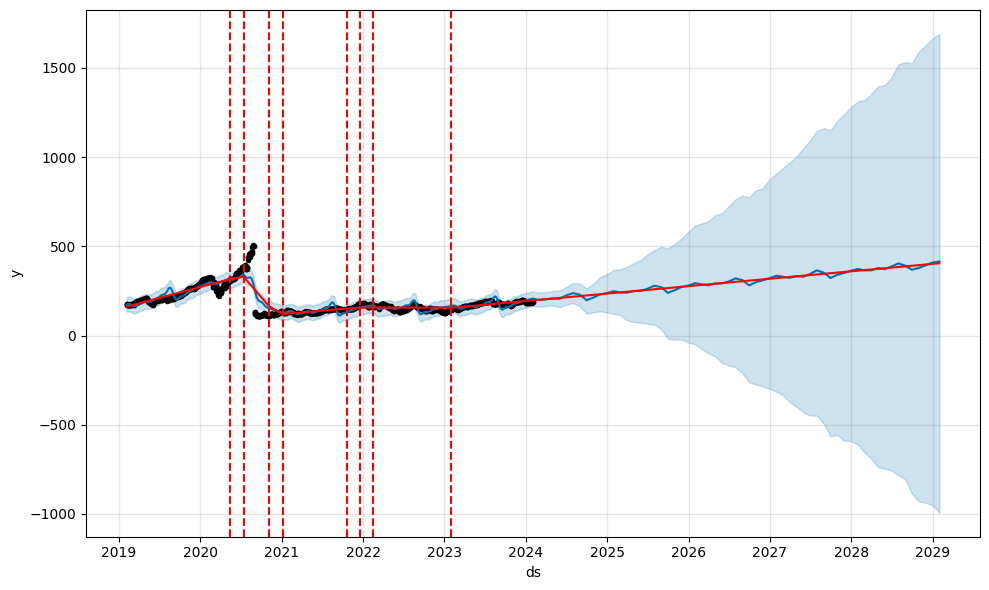

In [14]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),
							m, forecast)